# Cross Spectral Density Estimator Test


In [1]:
using PyPlot

include("../AnalysisToolbox.jl")

steps = 10^7

W = randn(1,steps)

1×10000000 Array{Float64,2}:
 -0.940481  -0.637819  -0.652396  0.930769  …  0.424029  -0.613571  2.17006

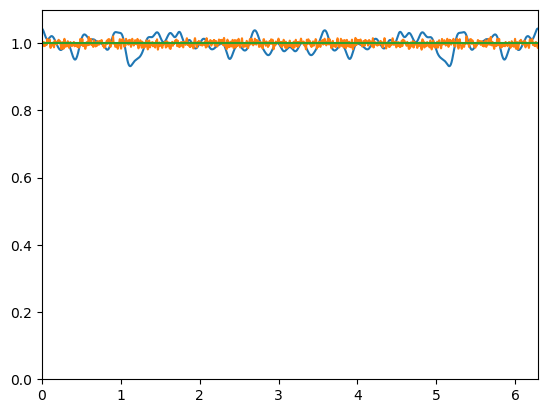

sum of μ: 1.0


C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


4-element Array{Float64,1}:
 0.0
 6.283185307179586
 0.0
 1.1

In [6]:
L    = 1000
Nex  = 10^6
win  = "Par"

nfft = 10^5
n    = 2
p    = 1000
ty   = "bin"


spect_D  = z_crossspect_fft_old(W,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(W, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,spect_D[1,1,:])

spect_D_old = spect_D

plot([0, 2π],[1, 1])
axis([0, 2π, 0, 1.1])

In [134]:
r = [-2 9 .1]

Wr = conv(r,W)[:,2:end]

1×10000001 Array{Float64,2}:
 1.00479  -2.86515  25.7833  -4.8697  …  6.58349  1.40483  0.0147594

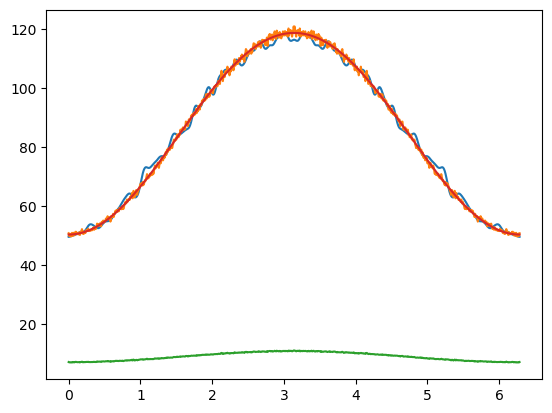

sum of μ: 1.0


C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000A2616908>

In [129]:
spect_D  = z_crossspect_fft_old(Wr,Wr;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(Wr, Wr;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[1] + r[2]*exp(-im*θ) + r[3]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ)conj(R(θ)),F_D))

sig and pred are not the same length. Taking min.sig and pred are not the same length. Taking min.sizes must be the same, taking min and truncating

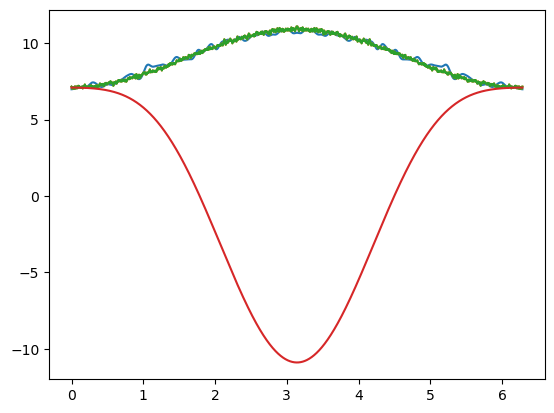


sum of μ: 1.0


C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000065F01DC8>

In [136]:
spect_D  = z_crossspect_fft_old(W,Wr;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(W, Wr;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:])
plot(F_D,[spect_D[1,1,:] spect_D_old[1,1,:]])

spect_D_old = spect_D

R(θ) = r[3] + r[2]*exp(-im*θ) + r[1]*exp(-2im*θ)

plot(F_D,map(θ -> R(θ),F_D))